https://www.python-graph-gallery.com/web-scatterplot-astronaut

https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/src/notebooks/web-scatterplot-astronaut.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Store sale

In [2]:
path = 'D:/00.University/00.Courses/PythonCourse/KNTU_Course/Data/Stores.csv'

In [3]:
store_data = pd.read_csv(path)
print(store_data.head())

   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620


In [4]:
store_data.shape

(896, 5)

In [6]:
np.min(store_data.Store_Area), np.max(store_data['Store_Area'])

(775, 2229)

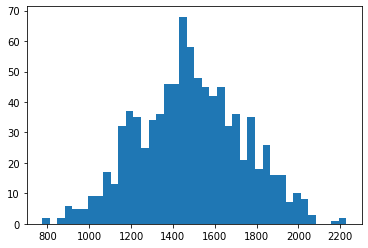

In [9]:
plt.figure()
plt.hist(store_data.Store_Area, bins=40)
plt.show()

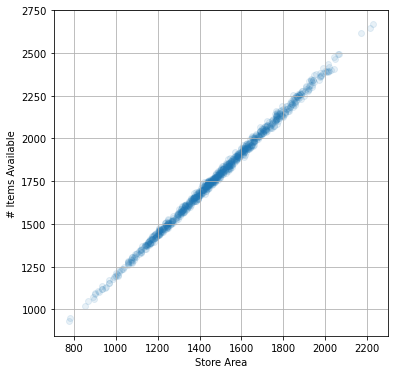

In [15]:
plt.figure(figsize=(6, 6))

plt.scatter(store_data.Store_Area, store_data.Items_Available, alpha=0.1)
plt.xlabel('Store Area')
plt.ylabel('# Items Available')
plt.grid(True)
plt.show()

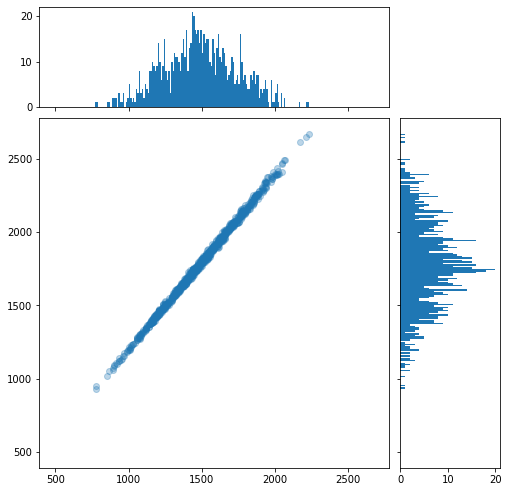

In [22]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, alpha=0.3)

    # now determine nice limits by hand:
    binwidth = 10
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(500, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')


# ---------------------------------------------------------------------------
# start with a square Figure
fig = plt.figure(figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(store_data.Store_Area, store_data.Items_Available, ax, ax_histx, ax_histy)

plt.show()

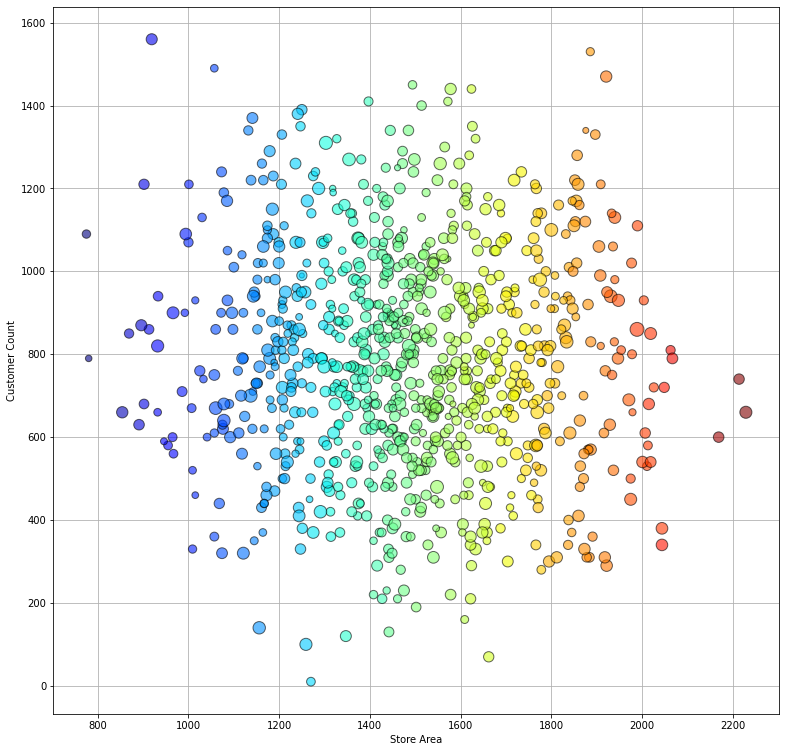

In [46]:
plt.figure(figsize=(13, 13))
plt.scatter(store_data.Store_Area, store_data.Daily_Customer_Count,
            c=store_data.Items_Available, s=store_data.Store_Sales / 600,
            cmap='jet', alpha=0.6, edgecolor='k', zorder=2)
plt.xlabel('Store Area')
plt.ylabel('Customer Count')
plt.grid(True, zorder=0)
plt.show()

# House prices

In [47]:
path = 'D:/00.University/00.Courses/PythonCourse/KNTU_Course/Data/train.csv'

In [48]:
data = pd.read_csv(path)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
data.shape

(1460, 81)

((0.0, 20000.0), (0.0, 500000.0))

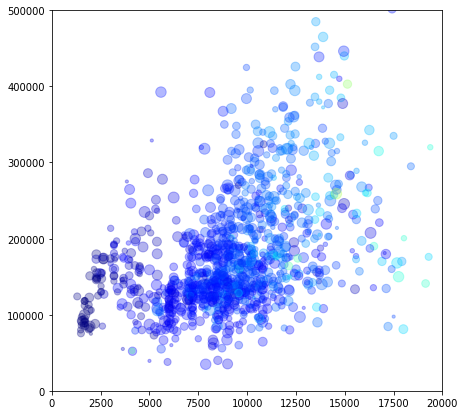

In [67]:
plt.figure(figsize=(7, 7))
plt.scatter(data.LotArea, data.SalePrice, c=data.LotFrontage, s=data.MoSold * 10, cmap='jet', alpha=0.3)
plt.xlim([0, 20000]), plt.ylim([0, 500000])